**NAME** : MOHAMMAD KHAIRULNAS BIN ABDUL LATIF

**CLASS** : GA-DSBC-23-003

**PROJECT TITLE** : TITANIC SURVIVED PREDICTION

# Introduction

In the early hours of April 15, 1912, a British luxury passenger liner named Titanic sank after colliding with an iceberg during its maiden voyage. This tragic event led to the loss of more than 1,500 lives, making it one of the deadliest peacetime maritime disasters in history.

The dataset we have at hand, train.csv, contains passenger data from the Titanic. It includes information such as the passenger's class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket fare, and port of embarkation. One of the columns, Survived, indicates whether the passenger survived the disaster or not.

The sinking of the Titanic was not just a disaster, but a complex event where survival was not random. Certain groups of people were more likely to survive than others, such as women, children, and the upper-class. This leads us to the problem at hand: Can we predict who would have survived the disaster based on the available passenger data?

In this analysis, we aim to explore this dataset, understand the factors that contributed to survival, and build a predictive model that can accurately predict the survival of passengers based on the given factors. This exercise will not only help us understand the tragic event better but also demonstrate the power of data analysis and predictive modeling in extracting insights and making predictions from raw data.

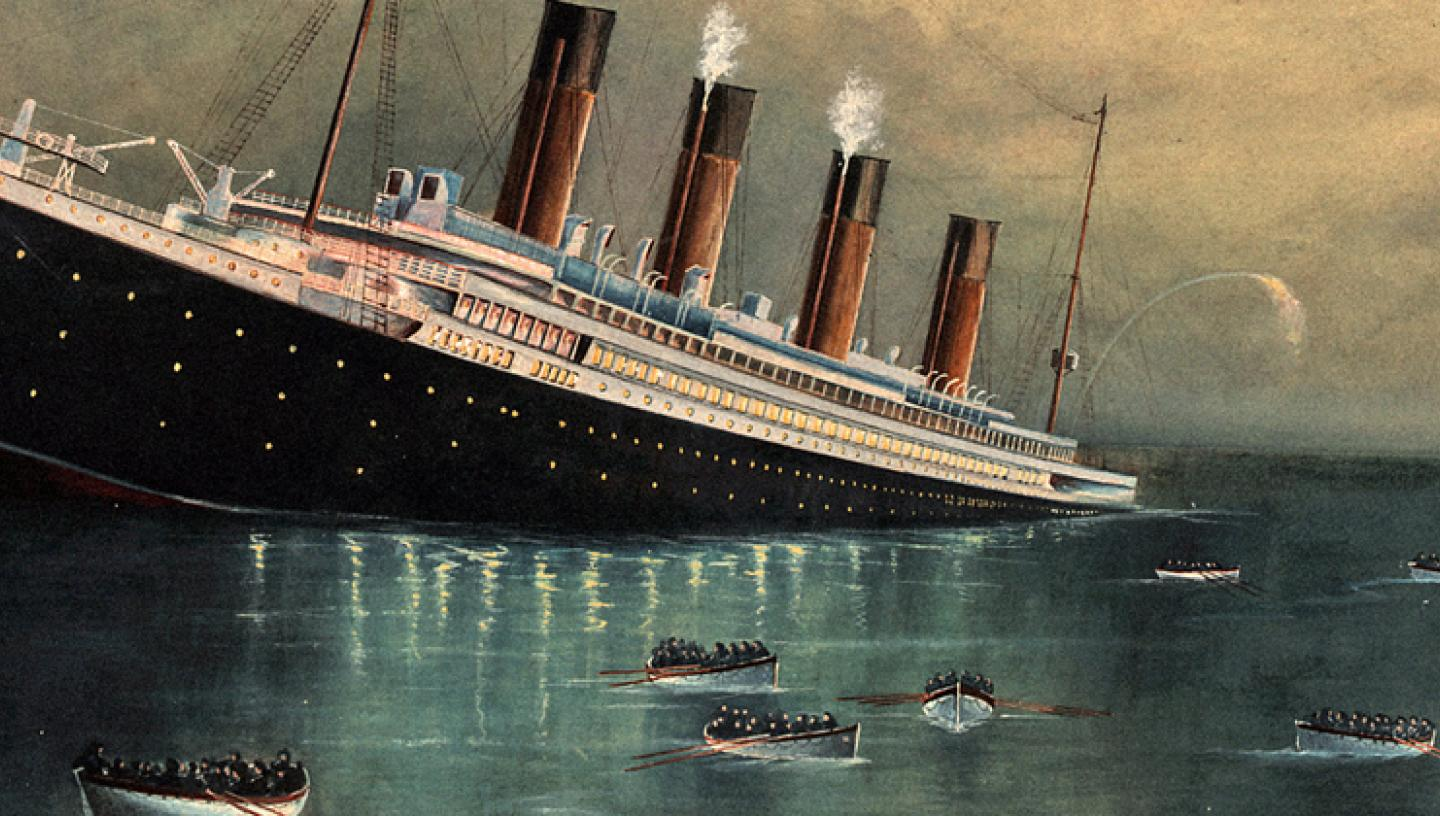

### Problem Statement

The sinking of the ship resulted in the loss of many lives. However, not all passengers were equally likely to survive the disaster. Factors such as the passenger's class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket fare, and port of embarkation may have influenced their chances of survival. The problem is to understand how these factors interacted and contributed to the survival or death of the passengers. The effects of this problem are significant as it can provide insights into the social and economic conditions of the time, and the scope of the problem extends to all passengers on the ship.

- Predict the survival of passengers on a ship based on features such as passenger class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket fare, and port of embarkation. This is a binary classification problem where the output is whether a passenger survived (1) or did not survive (0).

### Objective

- The objective is to develop a predictive model that can accurately predict the survival of passengers on a ship based on the factors.

This model can be used to understand the importance of each factor in determining survival, which can provide valuable insights for future safety measures and disaster management strategies. The model's performance will be evaluated based on its accuracy in predicting survival in the provided dataset.

##### The dataset contains the following columns:

PassengerId: An unique identifier for each passenger.

Survived: Whether the passenger survived or not (0 = No, 1 = Yes).

Pclass: The passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).

Name: The name of the passenger.

Sex: The sex of the passenger (male or female).

Age: The age of the passenger.

SibSp: The number of siblings/spouses the passenger had aboard.

Parch: The number of parents/children the passenger had aboard.

Ticket: The ticket number.

Fare: The fare the passenger paid.

Cabin: The cabin number.

Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Data Wrangling

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.inspection import permutation_importance

In [26]:
titanic = pd.read_csv('../train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic.shape


(891, 12)

In [28]:
titanic.size

10692

In [29]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis


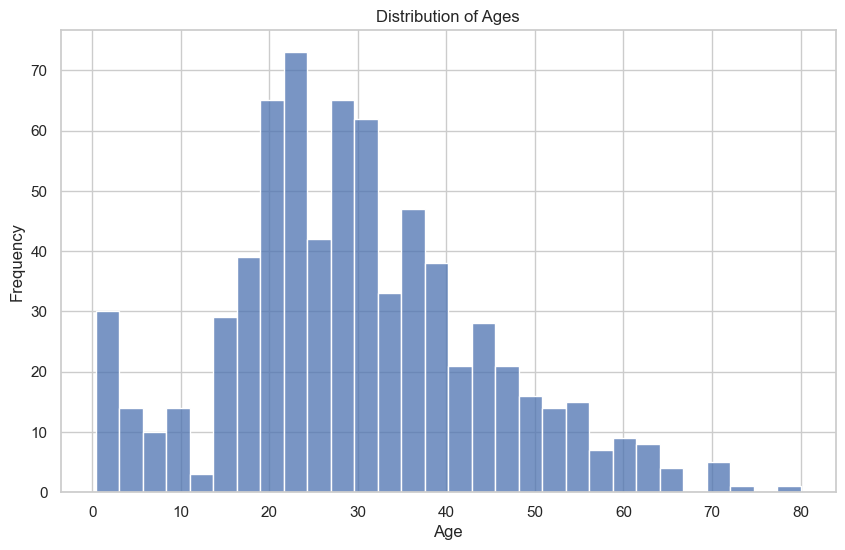

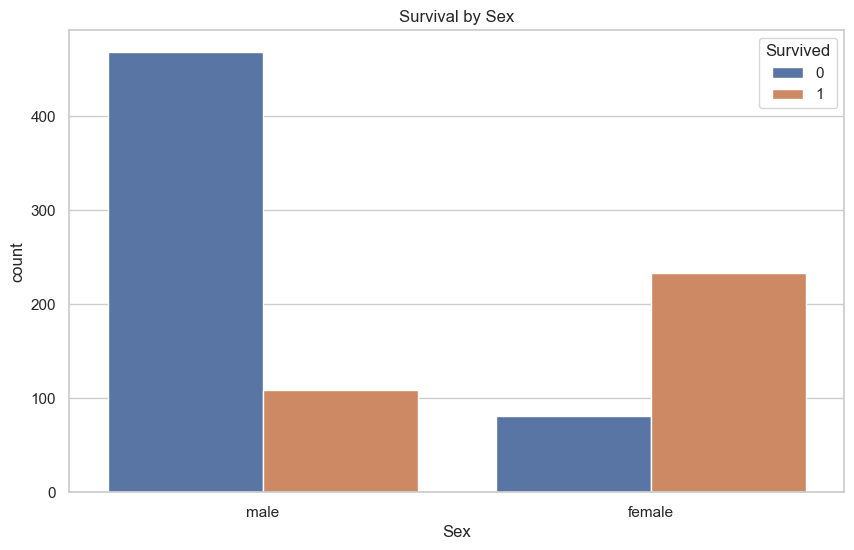

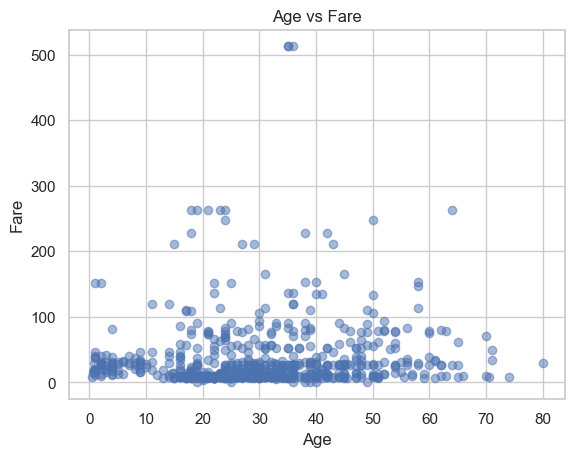

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style='whitegrid')

# Create a histogram of ages
plt.figure(figsize=(10, 6))
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.histplot(titanic['Age'].dropna(), kde=False, bins=30)
plt.show()

# Create a bar chart of the number of passengers who survived by sex
plt.figure(figsize=(10, 6))
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.show()

# Create a scatter plot of age versus fare\nplt.figure(figsize=(10, 6))
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)
plt.show()

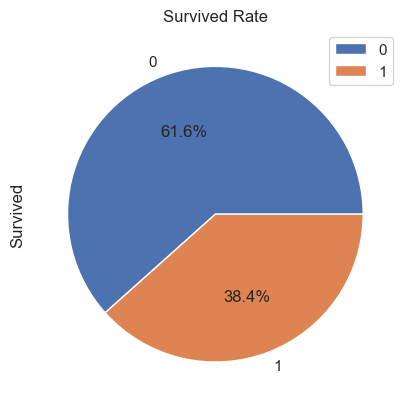

In [11]:
Survived_counts = titanic['Survived'].value_counts()

# Create a pie chart
Survived_counts.plot(kind='pie', autopct='%1.1f%%')

# Add a legend
plt.legend(Survived_counts.index, loc='upper right')

# Add a title
plt.title('Survived Rate')

# Show the chart
plt.show()

Survive

1= Yes, 
0= No

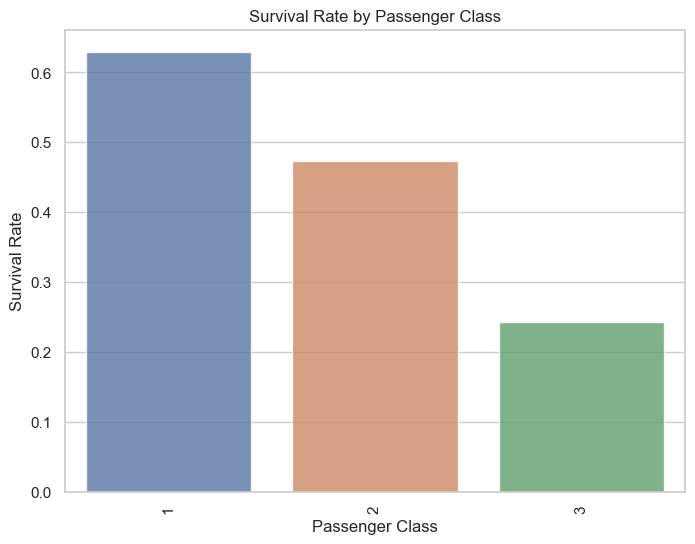

In [12]:
# Calculate survival rate by class
survival_rate = titanic.groupby('Pclass')['Survived'].mean()
# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, alpha=0.8)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

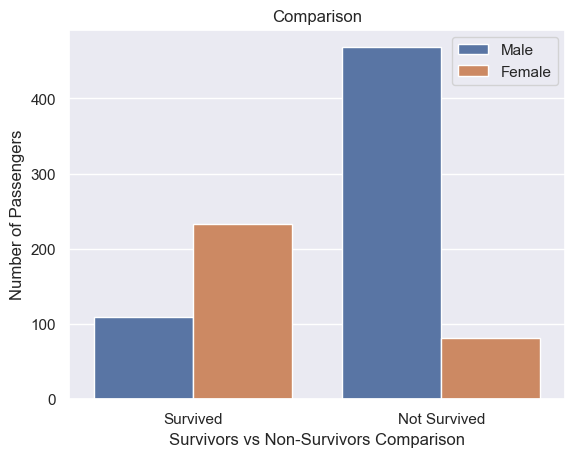

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(x= "Survived", hue="Sex", order=[1, 0], data = titanic).set(xticklabels=["Survived", "Not Survived"])
plt.xlabel("Survivors vs Non-Survivors Comparison")
plt.ylabel("Number of Passengers")
plt.title("Comparison")
plt.legend(labels=["Male", "Female"])
plt.show()

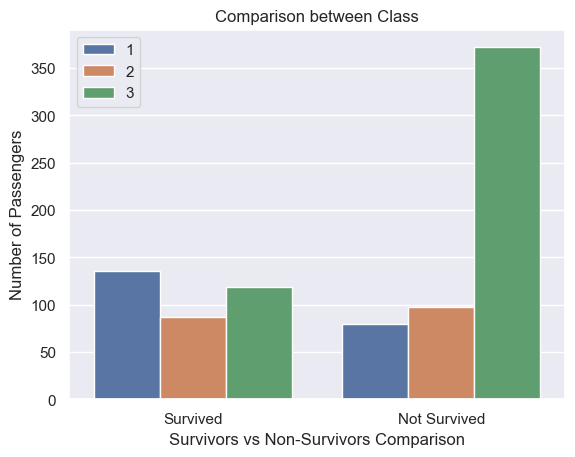

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x= "Survived", hue="Pclass", order=[1, 0], data = titanic).set(xticklabels=["Survived", "Not Survived"])
plt.xlabel("Survivors vs Non-Survivors Comparison")
plt.ylabel("Number of Passengers")
plt.title("Comparison between Class")
plt.legend(labels=["1", "2","3"])
plt.show()

## Feature Engineering

In [15]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [16]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
titanic['Embarked'] = titanic['Embarked'].fillna(method='bfill')

In [18]:
titanic = titanic.drop(['Cabin'],axis=1)

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
titanic = titanic.drop(['Name','Ticket','PassengerId'],axis=1)

In [21]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


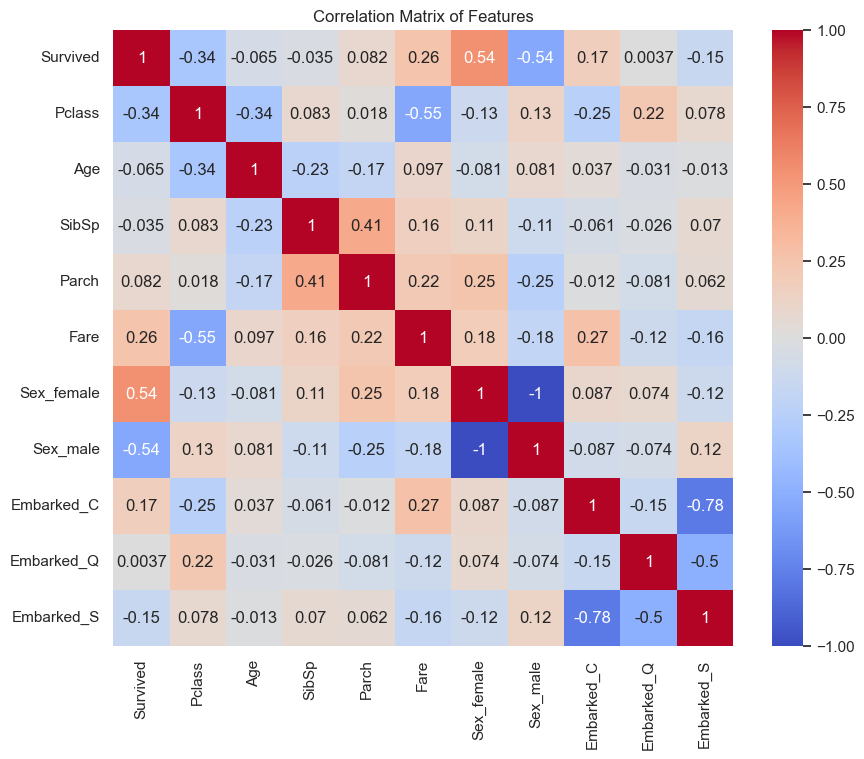

In [23]:
# Import seaborn for data visualization
import seaborn as sns

# Create a correlation matrix
corr_matrix = titanic.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Modelling

### Train splitting

In [513]:
X = titanic.drop(['Survived'],axis=1) 
y = titanic['Survived']

In [514]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

### Standardizing the data

In [515]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [516]:
display(X_train.head())
display(X_test.head())

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.584396,-0.093918,-0.479698,-0.460682,-0.018600,-0.728823,0.728823,2.067383,-0.311564,-1.611198
1,-1.584396,-0.093918,-0.479698,-0.460682,0.079245,-0.728823,0.728823,-0.483703,-0.311564,0.620656
2,-1.584396,-0.477013,-0.479698,0.810657,0.646624,-0.728823,0.728823,2.067383,-0.311564,-1.611198
3,-0.381742,-1.166586,0.493365,-0.460682,-0.031329,1.372075,-1.372075,2.067383,-0.311564,-1.611198
4,0.820913,0.059321,-0.479698,-0.460682,-0.479818,-0.728823,0.728823,-0.483703,-0.311564,0.620656


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.820913,-0.247156,0.493365,-0.460682,-0.315867,1.372075,-1.372075,-0.483703,-0.311564,0.620656
1,0.820913,-0.783490,-0.479698,-0.460682,-0.485419,-0.728823,0.728823,-0.483703,-0.311564,0.620656
2,0.820913,-0.706871,-0.479698,-0.460682,-0.467343,-0.728823,0.728823,-0.483703,-0.311564,0.620656
3,0.820913,-0.093918,-0.479698,-0.460682,0.506858,-0.728823,0.728823,-0.483703,-0.311564,0.620656
4,-0.381742,0.519036,0.493365,2.081997,-0.078596,-0.728823,0.728823,-0.483703,-0.311564,0.620656


### Model Implementation

#### LogisticRegression

In [517]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

accuracies = {} #empity list to combine the accuracies of all algorithms

lr = LogisticRegression()  #create model
lr.fit(X_train, y_train)  #fit the training data

acc = lr.score(X_test, y_test)*100 #compute accuracy of model

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Training Accuracy    : 80.48
Model Accuracy Score : 80.45
Test Accuracy 80.45%


#### DecisionTreeClassifier

In [518]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

dtc = DecisionTreeClassifier()  #create model
dtc.fit(X_train, y_train)  #fit the training data

acc = dtc.score(X_test, y_test)*100 #compute accuracy model

accuracies['DecisionTreeClassifier'] = acc
print("DecisionTreeClassifier Accuracy {:.2f}%".format(acc))

Training Accuracy     : 98.46
Model Accuracy Score  : 78.77
DecisionTreeClassifier Accuracy 78.77%


#### RandomForestClassifier

In [519]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

rf = RandomForestClassifier()  #create model
rf.fit(X_train, y_train)  #fit the training data

acc = rf.score(X_test, y_test)*100 #compute accuracy model

accuracies['RandomForestClassifier'] = acc
print("RandomForestClassifier Accuracy {:.2f}%".format(acc))

Training Accuracy     : 98.46
Model Accuracy Score  : 83.8
RandomForestClassifier Accuracy 82.68%


#### KNeighborsClassifier

In [520]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  #create model
knn.fit(X_train, y_train)  #fit the training data

acc = knn.score(X_test, y_test)*100 #compute accuracy model

accuracies['KNeighborsClassifier'] = acc
print("KNeighborsClassifier Accuracy {:.2f}%".format(acc))

Training Accuracy     : 86.24
Model Accuracy Score  : 80.45
KNeighborsClassifier Accuracy 80.45%


### Comparing Models 

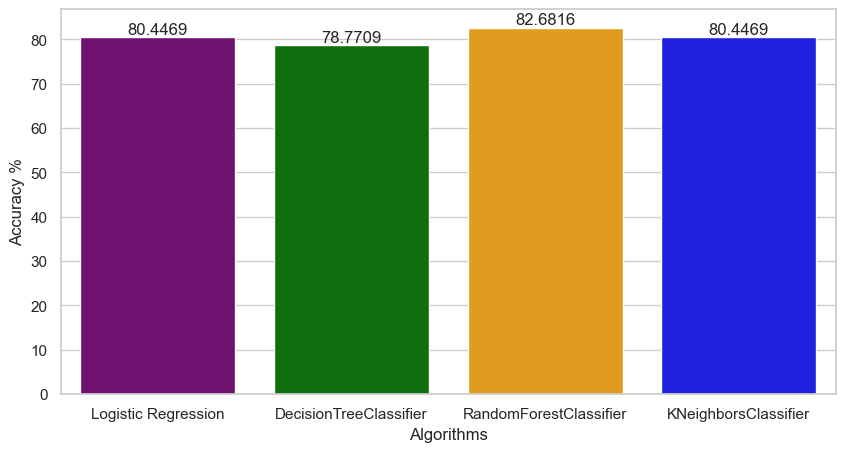

In [521]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    ax.bar_label(i, ) #function2

plt.show()

Highest model accuracy is Random Forest Classifier

In [522]:
# User defined function to make confusion matrix (can calculate manually)
from sklearn.metrics import confusion_matrix
models = [lr, dtc, rf, knn]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
confusion_matrices = {}

for model, model_name in zip(models, model_names):
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)

    confusion_matrices[f'cm_{model_name.lower()}'] = cm

    if model_name == 'LogisticRegression':
        cm_lr = cm
    elif model_name == 'DecisionTreeClassifier':
        cm_dtc = cm
    elif model_name == 'RandomForestClassifier':
        cm_rf = cm
    elif model_name == 'KNeighborsClassifier':
        cm_knn = cm

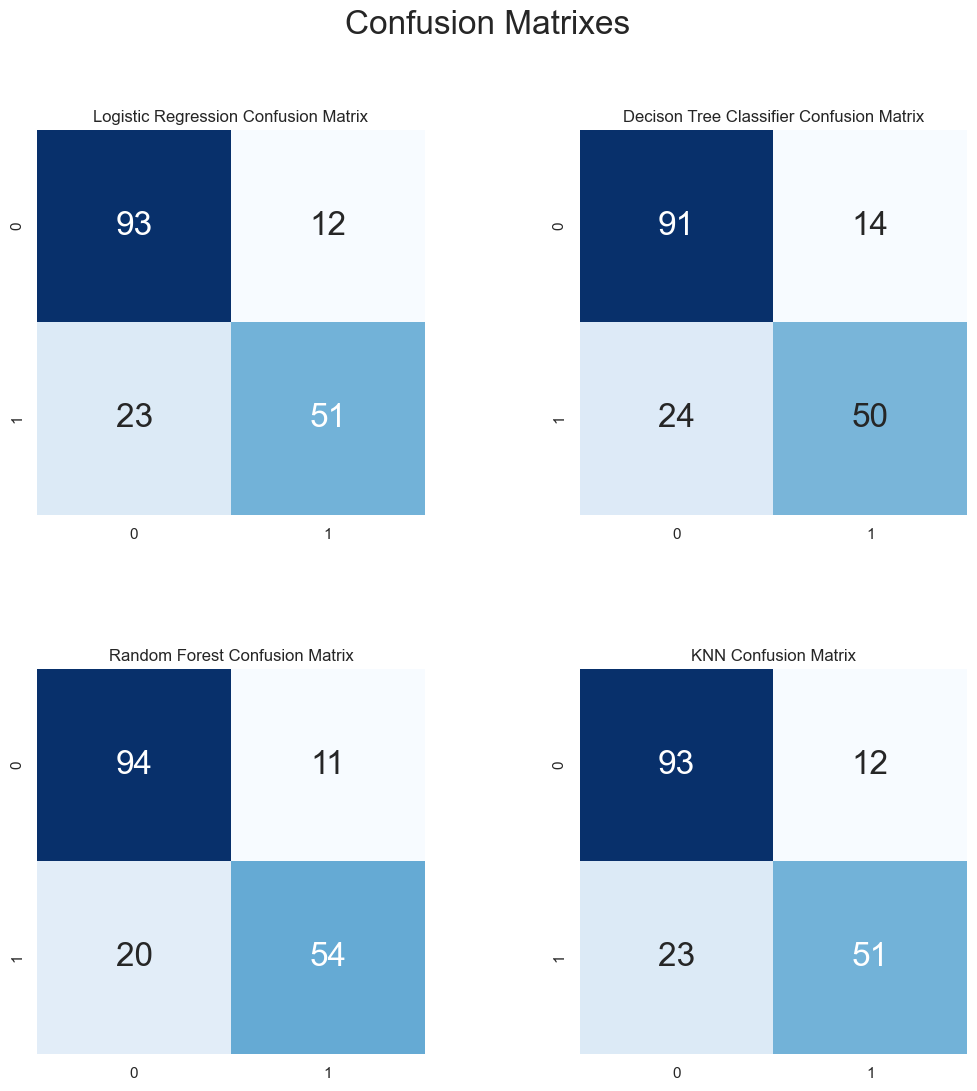

In [523]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# Plot Logistic Regression Confusion Matrix
plt.subplot(2, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot GBC Confusion Matrix
plt.subplot(2, 2, 2)
plt.title("Decison Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot RF Confusion Matrix
plt.subplot(2, 2, 3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot RF2 Confusion Matrix
plt.subplot(2, 2, 4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

### Features Importance using permutation importance method

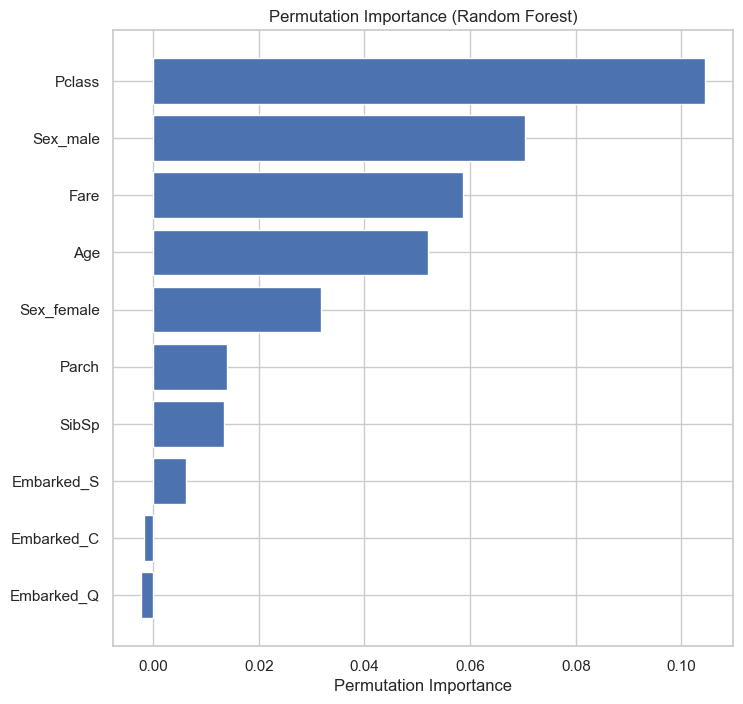

In [524]:
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

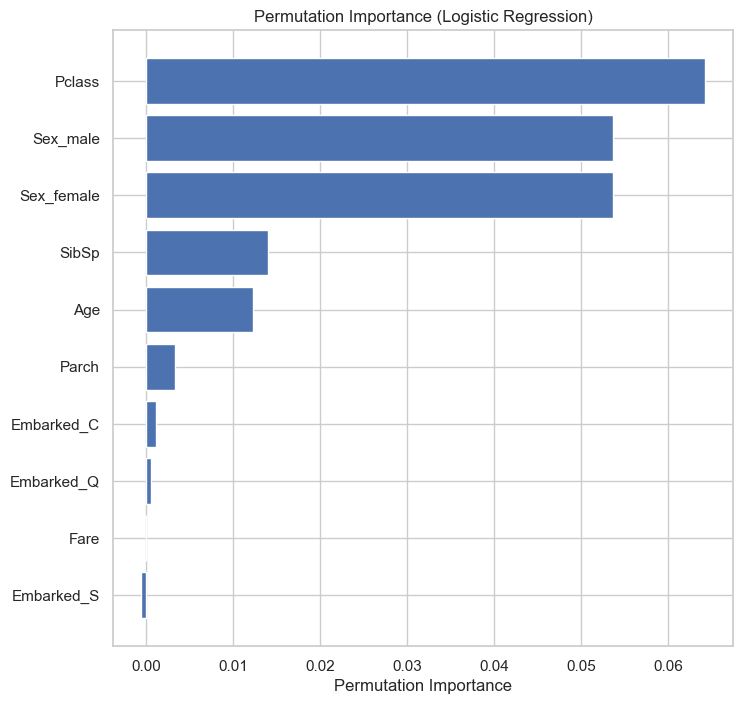

In [525]:
perm_importance = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Logistic Regression)')
plt.show()

### Feature Importance using Random Forest method

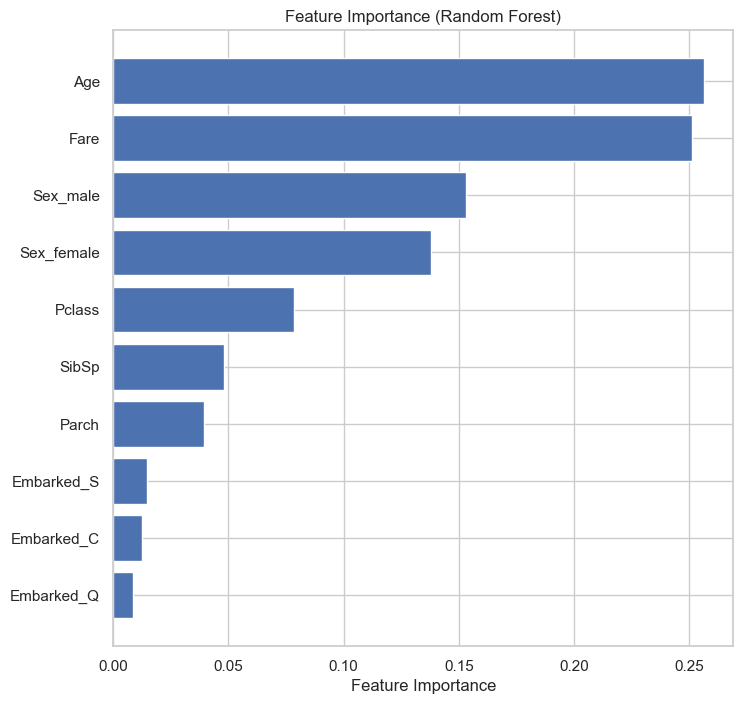

In [526]:
# Get feature importances from RandomForest
rf_feature_importances = rf.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [527]:
y=titanic.Survived.values
X=titanic.loc[:,['Age','Fare','Sex_male','Sex_female','Pclass']]

In [528]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,random_state=0)

In [529]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Evaluation and Recommendations

<BarContainer object of 4 artists>


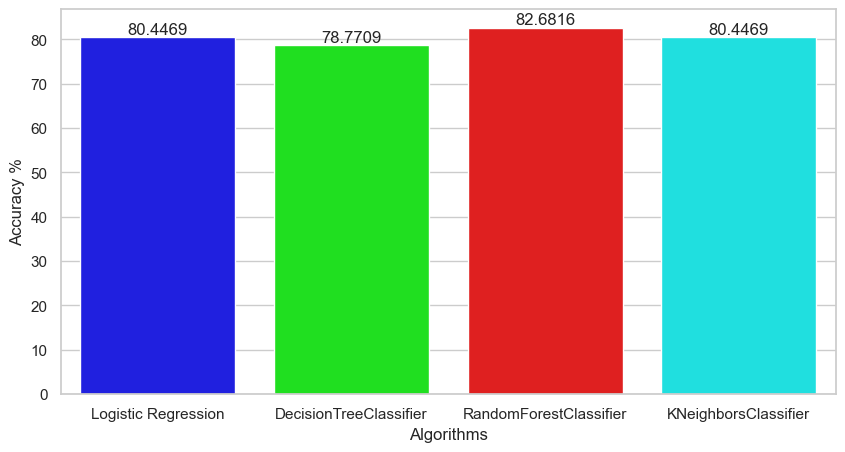

In [530]:
colors = ["blue", "lime", "red", "cyan"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    print(i)
    ax.bar_label(i, ) #function2

plt.show()

In [531]:
#pip install pydotplus

In [532]:
#conda install -c anaconda graphviz

In [533]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
import pydotplus

In [534]:
important_features = ['Age','Fare','Sex_male','Sex_female','Pclass']

f = titanic[important_features] #input
t = titanic['Survived'] #target

In [535]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [536]:
X_train, X_test, y_train, y_test = train_test_split(f, t, test_size=0.2, random_state=0)

In [537]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('pokok.png')

True

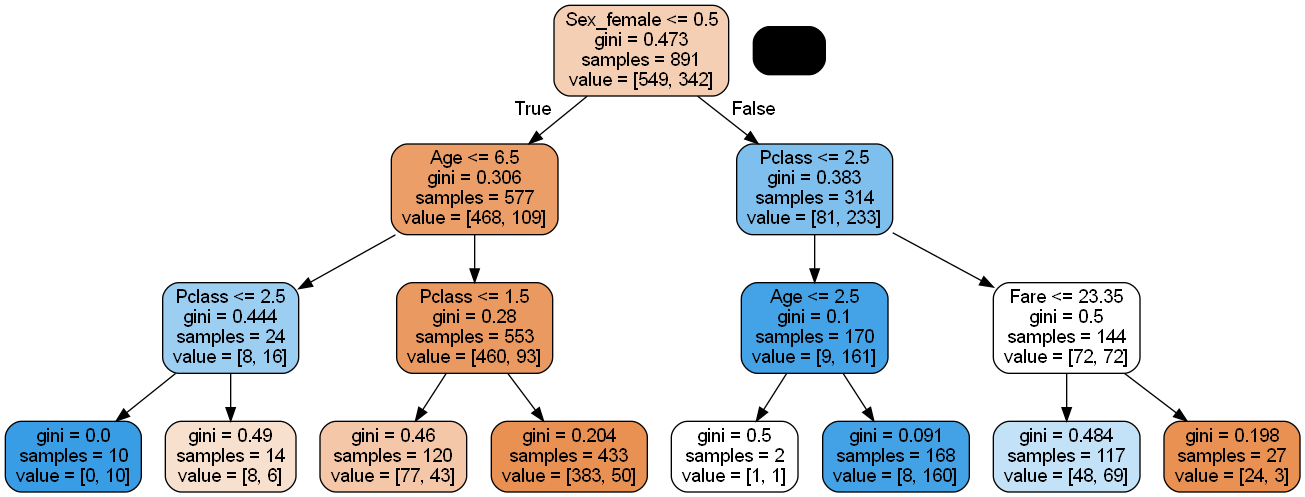

## Conclusion

### Main Finding

The Random Forest Classifier model was able to correctly predict the survival of passengers on the Titanic in about 82.68% of cases in the test set.

### Model Evaluation

The model's performance was evaluated using accuracy as the metric. The accuracy score of approximately 82.68% indicates that our model is performing well on the test set.

### Insight and Pattern

The preprocessing steps, such as handling missing values and converting categorical variables into numeric ones, played a crucial role in improving the model's performance. The model likely found patterns in the 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', and 'Embarked_S' features to make its predictions.

### Recommendation

While the model's performance is quite good, there's always room for improvement. We could consider tuning the hyperparameters of the Random Forest model or even try different machine learning models. Additionally, feature engineering could potentially improve the model's performance. For example, creating a new feature that combines 'SibSp' and 'Parch' to represent the total number of family members a passenger has on board might be useful.

### Conclusion

We successfully loaded and preprocessed the Titanic dataset, which included handling missing values, converting categorical variables into numeric ones, and dropping unnecessary columns. We then trained a Random Forest Classifier model on the data and achieved an accuracy of approximately 82.68% on the test set.